#`Feature Importance by Random Forest`

---



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier
random.seed(0)

In [63]:
df = pd.read_csv('cleaned3.csv')
df.head()

,Unnamed: 0,cancel,year,zip.code,ni.age,len.at.res,credit,premium,gender,ni.marital.status,...,house.color_blue,house.color_red,house.color_white,house.color_yellow,dwelling_Condo,dwelling_House,dwelling_Tenant,coverage_A,coverage_B,coverage_C
0,0,0,2013,98004.0,37.0,18.000000,2,950.507336,0,0.0,...,1,0,0,0,0,0,1,0,0,1
1,1,0,2013,85017.0,40.0,17.000000,1,909.346046,0,1.0,...,0,0,1,0,1,0,0,1,0,0
2,2,0,2013,80021.0,45.0,14.000000,2,897.084502,1,0.0,...,0,0,1,0,0,1,0,1,0,0
3,3,0,2013,85002.0,45.0,24.366136,2,979.039007,1,0.0,...,0,1,0,0,0,1,0,1,0,0
4,4,0,2013,50001.0,36.0,16.000000,2,932.379027,1,1.0,...,0,0,0,1,0,1,0,0,0,1


In [0]:
df = df.drop("Unnamed: 0", 1)
df = df.drop("zip.code", 1)
df = df.drop("year",1)

In [65]:
df.shape

(1025272, 30)

In [0]:
y = df[['cancel']]

In [0]:
X = df.iloc[:,1:df.shape[1]]

In [0]:
# Only using 10000 obs to show a rough idea

X_trial = X.sample(frac=1)[1:10000]
y_trial = y.sample(frac=1)[1:10000]

In [69]:
X.shape[1]

29

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 1) premium                       0.156277
 2) ni.age                        0.126354
 3) tenure                        0.111183
 4) len.at.res                    0.108257
 5) n.children                    0.066499
 6) n.adults                      0.059130
 7) credit                        0.034044
 8) gender                        0.024188
 9) ni.marital.status             0.020148
10) claim.ind                     0.018946
11) coverage_C                    0.017461
12) sales.channel_Broker          0.017285
13) dwelling_House                0.016692
14) house.color_white             0.016663
15) state_IA                      0.016585
16) state_AZ                      0.016314
17) coverage_A                    0.016281
18) sales.channel_Phone           0.016232
19) house.color_blue              0.015742
20) coverage_B                    0.014938
21) dwelling_Condo                0.014936
22) state_CO                      0.014814
23) dwelling_Tenant               0.014187
24) state_P

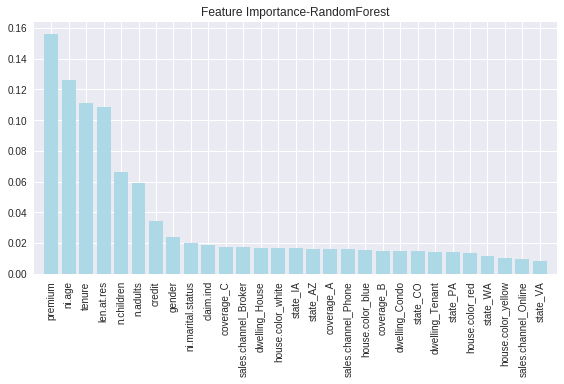

In [70]:

forest=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)


X_train=X_trial
y_train=y_trial

forest.fit(X_train,y_train)
importances=forest.feature_importances_

feat_labels = X.columns
indices=np.argsort(importances)[::-1]

X_train=np.array(X_train)
N=X_train.shape[1]
for f in range(X.shape[1]):
    # assess feature importance
    print ("%2d) %-*s %f" % (f+1,X.shape[1],feat_labels[indices[f]],importances[indices[f]]) )

#Visualization of feature importance
plt.title('Feature Importance-RandomForest')

plt.bar(range(X.shape[1]),importances[indices[:X.shape[1]]],color='lightblue',align='center')
plt.xticks(range(X.shape[1]),np.array(feat_labels)[indices[:X.shape[1]]],rotation=90)

plt.xlim([-1,X.shape[1]])
plt.tight_layout()
plt.show()
